# OCLI TRUE COLOR IMAGE
* [Link to download data](https://search.earthdata.nasa.gov/search/granules?p=C2954424032-OB_DAAC&pg[0][v]=f&pg[0][gsk]=-start_date&sb[0]=-77.0625%2C35.74143%2C-66.02344%2C42.97682&qt=2024-07-02T00%3A00%3A00.000Z%2C2024-07-02T23%3A59%3A59.999Z&fi=OLCI&fl=2%2B-%2BGeophys.%2BVariables%252C%2BSensor%2BCoordinates!1%2B-%2BRadiance&gdf=NetCDF&tl=1738540001!3!!&lat=30.480468750000004&long=-100.125&zoom=3)
### History: <br>
> * *2/3/25: notebook initialized*
#### HOW TO FIND DATA: 
* navigate to NASA earthdata search
* click calendar icon --> input query date
* click cropping icon --> create polygon around study region
* dataset used: Sentinel-3A OLCI Inland Waters (ILW) Data, version 4

In [1]:
proj_name = 'SEASCAPES'
import os

if os.path.expanduser('~') == '/home/nefsc':
    os.chdir(r'/home/nefsc/Documents/SEASCAPES/CODE')
elif os.path.expanduser('~') == r'C:\Users\haley.synan':
    os.chdir(r'C:\Users\haley.synan\Documents\SEASCAPES\CODE\PYTHON')
else:
    print('OTHER')

os.getcwd()

%run ./startupfile_new.ipynb #run startup file and install libraries if necessary
from xarray.backends.api import open_datatree

In [2]:
datatree = open_datatree(r'C:\Users\haley.synan\Documents\DATA\S3A_OLCI_EFRNT.20240702T145012.L2.ILW_CONUS.V4.nc')
ds1 =  open_datatree(r'C:\Users\haley.synan\Documents\DATA\S3A_OLCI_EFRNT.20240702T145312.L2.ILW_CONUS.V4.nc')
#datatree = open_datatree(r'C:\Users\haley.synan\Documents\DATA\S3A_OLCI_EFRNT.20240706T144927.L2.ILW_CONUS.V4.nc')
dataset = xr.merge(datatree.to_dict().values())
ds1 = xr.merge(ds1.to_dict().values())

#ds=xr.merge([datatree.to_dict().values(),ds1.to_dict().values()],compat='override')

In [5]:
r= dataset.rhos_620
g=dataset.rhos_560
b=dataset.rhos_490

r1= ds1.rhos_620
g1=ds1.rhos_560
b1=ds1.rhos_490

r = (r - r.min()) / (r.max() - r.min())
g= (g - g.min()) / (g.max() - g.min())
b = (b - b.min()) / (b.max() - b.min())

r1 = (r1 - r1.min()) / (r1.max() - r1.min())
g1= (g1 - g1.min()) / (g1.max() - g1.min())
b1 = (b1 - b1.min()) / (b1.max() - b1.min())

# Apply range limits for each channel. RGB values must be between 0 and 1
r = np.clip(r, 0, 1)
g = np.clip(g, 0, 1)
b = np.clip(b, 0, 1)
r1 = np.clip(r1, 0, 1)
g1 = np.clip(g1, 0, 1)
b1 = np.clip(b1, 0, 1)

# Apply a gamma correction to the image to correct ABI detector brightness
gamma = 1.5
r = np.power(r, 1/gamma)
g = np.power(g, 1/gamma)
b = np.power(b, 1/gamma)
r1 = np.power(r1, 1/gamma)
g1 = np.power(g1, 1/gamma)
b1 = np.power(b1, 1/gamma)



RGB = np.dstack([r,g,b])
rgb1=np.dstack([r1,g1,b1])


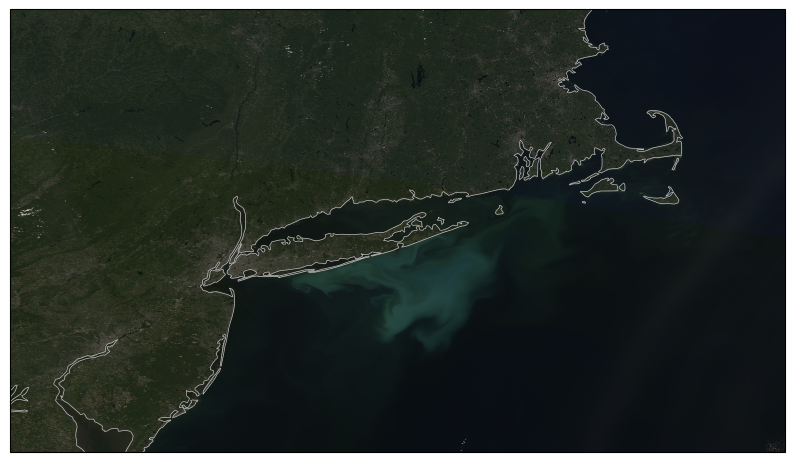

In [7]:
fig = plt.figure(figsize=(10, 7)) #set figure size
map_projection = cartopy.crs.PlateCarree() #set map projection
ax = plt.axes(projection=map_projection) 
plt.pcolormesh(dataset.longitude,dataset.latitude,RGB )
plt.pcolormesh(ds1.longitude,ds1.latitude,rgb1 )
ax.coastlines(color='silver',linewidth=0.5)
ax.set_extent([-76, -69, 39, 43])
plt.savefig(r'C:\Users\haley.synan\Documents\DATA\S3A_OLCI__TC_07022024.png',dpi=900,bbox_inches='tight') 